# Στοιχεία φοιτητών

**Συμμετέχοντες:** \
ΤΥΠΑΛΔΟΣ-ΠΑΥΛΟΣ ΑΠΟΣΤΟΛΑΤΟΣ 1115201800009



# Initialisation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix
from gensim.parsing.preprocessing import remove_stopwords
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/AI2/"

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv(path + "vaccine_train_set.csv",index_col=0)
validation_set = pd.read_csv(path + "vaccine_validation_set.csv",index_col=0)
print(train_df)
print(validation_set)
# print(validation_set.iat[0,0])

                                                   tweet  label
0      Sip N Shop Come thru right now #Marjais #Popul...      0
1      I don't know about you but My family and I wil...      1
2      @MSignorile Immunizations should be mandatory....      2
3      President Obama spoke in favor of vaccination ...      0
4      "@myfoxla: Arizona monitoring hundreds for mea...      0
...                                                  ...    ...
15971  @Salon if u believe the anti-vax nutcases caus...      1
15972  How do you feel about parents who don't #vacci...      0
15973  70 Preschoolers Tested for Measles in Simi Val...      0
15974  Finance Minister: Budget offers room to procur...      0
15975  Are you up to date on vaccines? Take CDC’s vac...      2

[15976 rows x 2 columns]
                                                  tweet  label
0     @user They had a massive surge in with covid d...      1
1     Required vaccines for school: Parents and guar...      0
2     “@KCStar: T

# Προεπεξεργασία δεδομένων
κανω ολες τις λεξεις lowercase ετσι ωστε να μην θεωρουνται διαφορετικες λογω ενος κεφαλαιου αρχικου γραμματος και βγαζω σημεια στιξης

In [ ]:
train_df['tweet'] = train_df['tweet'].apply(lambda x: x.lower())
train_df['tweet'] = train_df['tweet'].apply(lambda x: re.sub(r'\W', ' ', x))
train_df['tweet'] = train_df['tweet'].apply(lambda x:re.sub(r'\s+', ' ', x))

validation_set['tweet'] = validation_set['tweet'].apply(lambda x: x.lower())
validation_set['tweet'] = validation_set['tweet'].apply(lambda x: re.sub(r'\W', ' ', x))
validation_set['tweet'] = validation_set['tweet'].apply(lambda x:re.sub(r'\s+', ' ', x))


In [ ]:
train_df = train_df.drop(train_df[train_df.tweet.str.len() < 2].index)
validation_set = validation_set.drop(validation_set[validation_set.tweet.str.len() < 2].index)

## Αφαίρεση stopwords
i.e “a”, “the”, “is” etc

In [ ]:

train_df['tweet'] = train_df['tweet'].apply(lambda x: remove_stopwords(x))
validation_set['tweet'] = validation_set['tweet'].apply(lambda x: remove_stopwords(x))


# Οπτικοποίηση Δεδομένων

In [ ]:
print("test set Examples:")
pd.DataFrame(train_df['tweet']).head(10)

test set Examples:


,tweet
0,sip n shop come right marjais popularnobodies ...
1,t know family covid19 vaccine anytime soon
2,msignorile immunizations mandatory period okla...
3,president obama spoke favor vaccination childr...
4,myfoxla arizona monitoring hundreds measles li...
5,whooping cough vaccine day bring baby home t l...
6,prosecutor ken ervin want know recklessly kill...
7,uberfacts average people complain live longer ...
8,legacy jennymccarthy took clothes contributed ...
9,uberfacts average people complain live longer ...


In [ ]:
print("validation set Examples:")
pd.DataFrame(validation_set['tweet']).head(10)
# values, counts = np.unique(validation_set['label'], return_counts=True)
# print(values, counts )

validation set Examples:


,tweet
0,user massive surge covid deaths immediately va...
1,required vaccines school parents guardians chi...
2,kcstar johnson county children measles http t ...
3,nv better states best worst vaccinating kids h...
4,like killing w fear mt alyssa_milano vaccine f...
5,m subscribing panic du jour s measles remember...
6,801punx fav songs check aptbs exploding head a...
7,happend covid 19 vaccine test candidates died ...
8,zenith bs gt gt cdc says ebola vaccine works w...
9,dlockyer second occurrence read vaccines harmi...


# Classification

##My custom vectorizer

In [ ]:
def vectorizer():
  print()



παρατηρώ οτι το testing με unigrams δηλαδη batches 1 η 2 λεξεων δινει καλυτερα αποτελεματα προβλεψεις στο training και testing dataset. δινω ποσοστα και για το training για να δουμε το over/under-fitting

##Confusion Matrix

In [ ]:
def ConfusionMatrix(test_label,ypred):
  C = confusion_matrix(test_label,ypred)
  confusionMatrix = pd.DataFrame(data = C, index=['neutral(0), true','anti-vax(1), true','pro-vax(2), true'], columns = ['neutral(0), predicted','anti-vax(1), predicted','pro-vax(2), predicted'])
  confusionMatrix.loc['sum'] = confusionMatrix.sum()
  confusionMatrix['sum'] = confusionMatrix.sum(axis=1)
  print(confusionMatrix.to_string())
  confMx = confusionMatrix.values[0:3,0:3]
  plt.matshow(confMx, cmap=plt.cm.gray)
  plt.show()



In [ ]:
def MySoftMax():
  test_result = 0.0
  train_result = 0.0
  SoftMax=LogisticRegression(multi_class = 'multinomial',solver = 'lbfgs',max_iter=1000)
  SoftMax.fit(traindata,trainlabel) #execute each clustering method
  accuracy = SoftMax.score(testdata, testlabel) # grade how much the content of the test text set,based on the training, corresponds it's true label
  y_pred=SoftMax.predict(testdata) # experimentaly predict the label based on our training and compare it to the true label
  print("SoftMax")
  print("accuracy = ", accuracy * 100, "%")
  for metric,metric_name in zip([f1_score(testlabel,y_pred,average='macro' ) * 100,recall_score(testlabel,y_pred,average='macro' ) * 100,precision_score(testlabel,y_pred,average='macro',zero_division=0) * 100], ["F measure =","recall score =","precision score ="]):#ngram_range has varying result
    print(metric_name,metric , "%")
    test_result+=metric
  test_results.append(test_result/3)#keep the mean of the metrics for Learning Curve plotting
  ConfusionMatrix(testlabel,y_pred);
  print("ON TRAINING DATA = ")
  accuracy = SoftMax.score(traindata, trainlabel)
  print("accuracy on training data = ", accuracy * 100, "%")
  y_pred=SoftMax.predict(traindata) 
  for metric,metric_name in zip([f1_score(trainlabel,y_pred,average='macro' ) * 100,recall_score(trainlabel,y_pred,average='macro' ) * 100,precision_score(trainlabel,y_pred,average='macro',zero_division=0) * 100], ["F measure =","recall score =","precision score ="]):#ngram_range has varying result
    print(metric_name,metric , "%")
    train_result+=metric
  train_results.append(train_result/3)
  ConfusionMatrix(trainlabel,y_pred);

CountVectorizer with unigrams
------------------
SoftMax
accuracy =  68.05433829973707 %
F measure = 58.349739329672566 %
recall score = 57.288034926700796 %
precision score = 63.82884312918915 %
                   neutral(0), predicted  anti-vax(1), predicted  pro-vax(2), predicted   sum
neutral(0), true                     841                      21                    203  1065
anti-vax(1), true                     74                      68                    154   296
pro-vax(2), true                     241                      36                    644   921
sum                                 1156                     125                   1001  2282


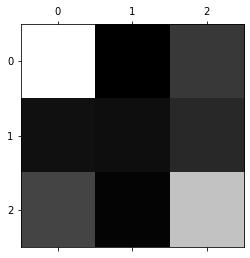

ON TRAINING DATA = 
accuracy on training data =  69.39784677015524 %
F measure = 58.59326088887483 %
recall score = 57.78703891360415 %
precision score = 64.55323975902081 %
                   neutral(0), predicted  anti-vax(1), predicted  pro-vax(2), predicted    sum
neutral(0), true                    5965                     135                   1358   7458
anti-vax(1), true                    549                     425                   1099   2073
pro-vax(2), true                    1517                     231                   4697   6445
sum                                 8031                     791                   7154  15976


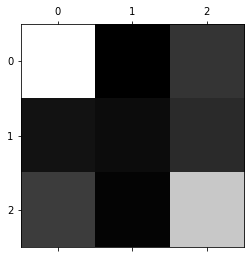


TfidfVectorizer with unigrams
------------------
SoftMax
accuracy =  59.99123575810692 %
F measure = 42.715230624323446 %
recall score = 45.90672518644257 %
precision score = 40.13338714947434 %
                   neutral(0), predicted  anti-vax(1), predicted  pro-vax(2), predicted   sum
neutral(0), true                     744                       0                    321  1065
anti-vax(1), true                     67                       0                    229   296
pro-vax(2), true                     296                       0                    625   921
sum                                 1107                       0                   1175  2282


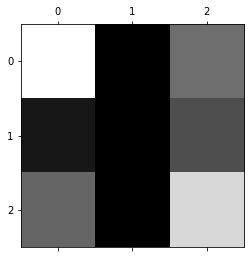

ON TRAINING DATA = 
accuracy on training data =  59.996244366549824 %
F measure = 42.718346865585325 %
recall score = 45.92034156902305 %
precision score = 40.12089331675852 %
                   neutral(0), predicted  anti-vax(1), predicted  pro-vax(2), predicted    sum
neutral(0), true                    5200                       0                   2258   7458
anti-vax(1), true                    509                       0                   1564   2073
pro-vax(2), true                    2060                       0                   4385   6445
sum                                 7769                       0                   8207  15976


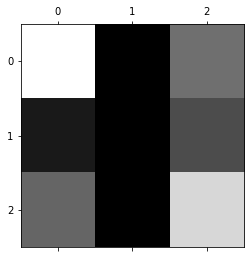


HashingVectorizer
------------------
SoftMax
accuracy =  62.35758106923751 %
F measure = 56.07390010999688 %
recall score = 55.85586791085254 %
precision score = 56.3355171722425 %
                   neutral(0), predicted  anti-vax(1), predicted  pro-vax(2), predicted   sum
neutral(0), true                     750                      70                    245  1065
anti-vax(1), true                     87                     105                    104   296
pro-vax(2), true                     254                      99                    568   921
sum                                 1091                     274                    917  2282


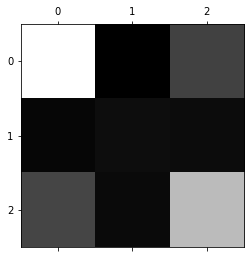

ON TRAINING DATA = 
accuracy on training data =  77.83550325488233 %
F measure = 74.25009912269148 %
recall score = 72.94347263514832 %
precision score = 76.10396059997072 %
                   neutral(0), predicted  anti-vax(1), predicted  pro-vax(2), predicted    sum
neutral(0), true                    6177                     189                   1092   7458
anti-vax(1), true                    324                    1189                    560   2073
pro-vax(2), true                    1092                     284                   5069   6445
sum                                 7593                    1662                   6721  15976


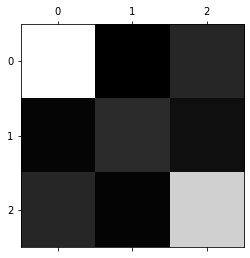

In [ ]:
test_results = []
train_results = []
trainlabel = np.asarray(train_df['label'])#extract true-false label
testlabel=np.asarray(validation_set['label'])

for vectorizer,name in zip([CountVectorizer(ngram_range=(1,2) ,max_features=200),TfidfVectorizer(ngram_range=(1,2), max_features=10),HashingVectorizer(ngram_range=(1,2),n_features= 2 ** 11)], ["CountVectorizer with unigrams","TfidfVectorizer with unigrams","HashingVectorizer"]):#ngram_range has varying result
  test_result = 0.0
  train_result = 0.0
  dataset=train_df.tweet
  X1 = vectorizer.fit_transform(dataset)
  traindata=X1.toarray() #make a 2d array of with the frequencies of the word ngrams
  means = np.mean(traindata, axis=0)
  stds = np.std(traindata, axis=0)
  traindata = (traindata - means)/stds #optimises the vector
  dataset=validation_set.tweet #same for test
  X1 = vectorizer.transform(dataset) # see below why i transform and not fit_transform again
  testdata=X1.toarray()
  # print(traindata)
  means = np.mean(testdata, axis=0)
  stds = np.std(testdata, axis=0)
  testdata = (testdata - means)/stds
  # print(testdata)
  print(name)
  print("------------------")
  MySoftMax()


  print()
  # test_results.append((accuracy*100,recall_score(testlabel,y_pred,average='macro' ) * 100,precision_score(testlabel,y_pred,average='macro' ) * 100))

# Classification with Word2Vec
εδω κανουμε τα ιδια αλλα για τον 2d array των simililarities επειδη η συναρτηση get_normed_vectors() που μας δινει το similarity vector των n λεξεων του document δεν υποστηριζεται στο google colab φτιαχνουμε αυτον τον πινακα μονοι μας

το tokens ειναι ολα τα text σε λιστα,το record ενα node της λιστας (text προταση split-αρισμενη) το word ειναι ενα κομματι της split προτασης και για καθε τετοια word παιρνουμε ενα πινακα καταληγωντας σε εναν 2d array traindata
για n λεξεις


In [ ]:
sentences = pd.concat([train_df.tweet,validation_set.tweet],ignore_index=True)
nltk.download('punkt')
# simple tokenization
tokens = [nltk.word_tokenize(sentence) for sentence in sentences]

w2vmodel = Word2Vec(tokens,
                    seed=32,
                    negative=5,
                    sg=0,
                    min_count=1,
                    window=1)

w2vmodel.build_vocab(tokens, update=True)  # prepare the model vocabulary
w2vmodel.train(tokens, total_examples=len(tokens), epochs=2)
train_tokens = [nltk.word_tokenize(sentences) for sentences in train_df.tweet ]
test_tokens = [nltk.word_tokenize(sentences) for sentences in validation_set.tweet]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


SoftMax
accuracy =  65.4250657318142 %
F measure = 48.52593690330007 %
recall score = 50.75752290346042 %
precision score = 57.56761386403186 %
                   neutral(0), predicted  anti-vax(1), predicted  pro-vax(2), predicted   sum
neutral(0), true                     826                       8                    231  1065
anti-vax(1), true                     77                      10                    209   296
pro-vax(2), true                     258                       6                    657   921
sum                                 1161                      24                   1097  2282


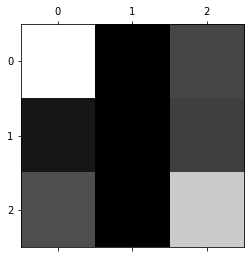

ON TRAINING DATA = 
accuracy on training data =  65.98647971957938 %
F measure = 48.391237027203985 %
recall score = 50.93409557448734 %
precision score = 54.429770523745816 %
                   neutral(0), predicted  anti-vax(1), predicted  pro-vax(2), predicted    sum
neutral(0), true                    5885                      57                   1516   7458
anti-vax(1), true                    579                      50                   1444   2073
pro-vax(2), true                    1784                      54                   4607   6445
sum                                 8248                     161                   7567  15976


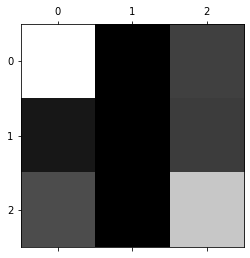

In [ ]:
test_result = 0.0
train_result = 0.0
traindata = [np.array([w2vmodel[word] for word in record]).mean(axis=0) for record in train_tokens]
testdata = [np.array([w2vmodel[word] for word in record]).mean(axis=0) for record in test_tokens]
MySoftMax()

print()


#Συμπερασματα(προσωρινα)
τα μοντελα μου εχουν μια ελαφρη κλιση προς το neutral και εχουν τρομερο προβλημα στο να ανιχνευουν anti-vax tweets και απο εκει προερχονται τα χαμηλα ποσοστα ακριβειασ μου. αν μπορουσα να  φτιαξω το anti-vax μια 33% αυξηση των ποσοστων θα ηταν πολυ καλη 

ετρεξα τους vectorizers με μονο bigrams και ειδα μονο χειροτερα απολεσματα. κανενας λογος να επιλεχτει

ξαναετρεξα με αλλα Logistic Regression ορισματα οπως ovr multiclass saga, newton-cg solvers αλλα ειδα σχεδον μηδενικη διαφορα

η λυση ηταν ο hash vectorizer ο οποιος με τα default ορισματα κρασαρει λογω μνημης αλλα με μειωση του n_features δηλαδη σημαντικη μειωση στηλων του πινακα ειχαμε πολυ καλη αυξηση ευστοχιας. μια ακομα λεπτομερια ποιοτητα ειναι οτι σε confusion matrix οχι μονο η κυρια διαγωνιος ειναι η πιο ανοιχτοχρωμη αλλα η αντιθετη διαγωνιος ειναι η 2η πιο λευκη δηλαδη τα περισσοτερα misclassified positive πανε σε neutral(πιο κοντινο απο το να πανε anti-vax)

υστερα αφου διαβασα  [αυτη την συζητηση στο piazza](https://piazza.com/class/kud1bfc0uy62rl?cid=22) δοκιμασα να κανω transform αντι για fit_transform στο validation_set και στην περιπτωση του CountVectorizer και tfidf ειδα οτι η ακριβεια εφτασε πιο κοντα αυτη του training_set(απο 45% 60%) και εκλεισε τη διαφορα με τον hashingVectorizer

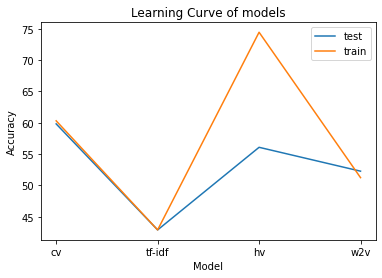

In [ ]:

plt.plot(["cv","tf-idf","hv","w2v"], test_results)
plt.plot(["cv","tf-idf","hv","w2v"], train_results)
plt.legend(['test', 'train'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Learning Curve of models")
plt.show()